In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d, distance
from scipy.sparse import csgraph

from shapely import geometry

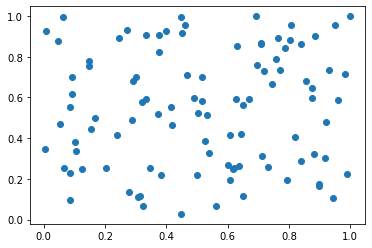

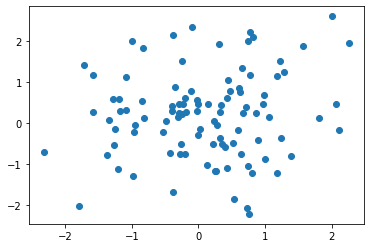

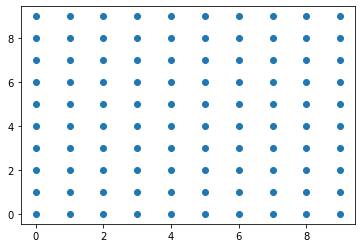

In [4]:
def uniform(N=100):
    return np.random.rand(N,2)

def gaussian(N=100):
    return np.random.randn(N,2)
    
def regular(N=100):
    c = np.floor(np.sqrt(N))
    x2,y2 = np.meshgrid(range(int(c)), range(int(c)))
    points = np.vstack([x2.ravel(), y2.ravel()])
    return points.transpose()


plt.figure(1)
plt.scatter(uniform()[:,0], uniform()[:,1])

plt.figure(2)
plt.scatter(gaussian()[:,0], gaussian()[:,1])

plt.figure(3)
plt.scatter(regular()[:,0], regular()[:,1])

In [5]:
def RFH(vor):
    rfs = []
    for cell in vor.regions:
        if cell and -1 not in cell:
            poly = geometry.Polygon([(vor.vertices[p]) for p in cell])
            rfs.append(4*np.pi*poly.area/(poly.length**2))
    res = 1 - np.std(rfs)/np.mean(rfs)
    return res

def AD(vor):
    areas = []
    for cell in vor.regions:
        if cell and -1 not in cell:
            poly = geometry.Polygon([(vor.vertices[p-1]) for p in cell])
            areas.append(poly.area)
            
    res = 1 - 1/(1+np.std(areas)/np.mean(areas))
    return res
        

In [6]:
def tri_to_mat(tri, value=0):
    M = np.full((tri.npoints, tri.npoints), value)
    d = distance.pdist(tri.points)
    distances = distance.squareform(d)
    
    for s in tri.simplices:
        M[s[0], s[1]] = distances[s[0], s[1]]
        M[s[1], s[2]] = distances[s[1], s[2]]
        M[s[2], s[0]] = distances[s[2], s[0]]
        
    return M
    
def charac(tri):
    M = tri_to_mat(tri)
    m = np.mean(M[M>0])
    s = np.std(M[M>0])
    
    return m,s

In [7]:
points = uniform()
tri = Delaunay(points)
vor = Voronoi(points)

In [8]:
ms, ss = charac(tri)

C:\Users\bruno\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\bruno\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\bruno\anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\bruno\anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\bruno\anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
rfh = RFH(vor)
ad = AD(vor)

In [9]:
ms

nan